In [1]:
!pip install CoolProp

  Using cached CoolProp-6.6.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.3 MB)


In [2]:
from CoolProp.CoolProp import PropsSI

In [3]:
fluid = 'CarbonDioxide'
alternativeFluid = 'Ammonia'

Q1 = 1 # quality
P1 = 1e6 # Pa
h1 = PropsSI('H','P',P1,'Q',Q1,fluid)
s1 = PropsSI('S','P',P1,'Q',Q1,fluid)
T1 = PropsSI('T','P',P1,'Q',Q1,fluid)

In [4]:
P2 = 3.64e6 # Pa
h2 = PropsSI('H','P',P2,'S',s1,fluid)
s2 = PropsSI('S','P',P2,'S',s1,fluid)
T2 = PropsSI('T','P',P2,'S',s1,fluid)

In [5]:
P3 = P2
h3 = PropsSI('H','P',P3,'Q',0,fluid)
s3 = PropsSI('S','P',P3,'Q',0,fluid)
T3 = PropsSI('T','P',P3,'Q',0,fluid)

In [6]:
P4 = P1
h4 = h3
s4 = PropsSI('S','P',P4,'H',h4,fluid)
T4 = PropsSI('T','P',P4,'H',h4,fluid)
Q4 = PropsSI('Q','P',P4,'H',h4,fluid)

In [7]:
mdot_kgPerS = 0.05

In [8]:
QL_W = mdot_kgPerS*(h1 - h4)
print('The rate of heat removal from the refrigerated space is {0:1.2f} W.'.format(QL_W))

The rate of heat removal from the refrigerated space is 11561.70 W.


In [9]:
Win_W = mdot_kgPerS*(h2 - h1)
print('The power input to the compressor is {0:1.2f} W.'.format(Win_W))

The power input to the compressor is 2875.73 W.


In [10]:
QH_W = mdot_kgPerS*(h2 - h3)
print('The heat rejected from the refrigerant environment is {0:1.2f} W.'.format(QH_W))

The heat rejected from the refrigerant environment is 14437.43 W.


In [11]:
COP = QL_W/Win_W
print('The coefficient of performance is {0:1.2f}.'.format(COP))

The coefficient of performance is 4.02.


In [12]:
import CoolProp
from CoolProp.Plots import PropertyPlot

In [13]:
#plot = PropertyPlot(fluid, 'ph')
#plot.calc_isolines()
#plot.show()

In [14]:
#plot = PropertyPlot(fluid, 'Ts')
#plot.calc_isolines()
#plot.show()

In [15]:
import numpy as np
import matplotlib.pyplot as plt

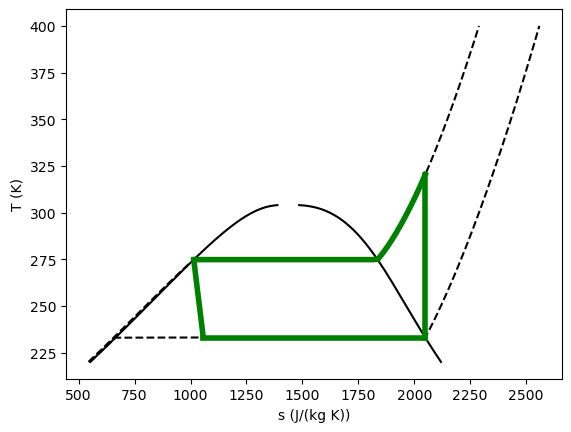

In [16]:
plt.figure()
plt.clf()
T = np.linspace(220, 400, 500) # range of temperatures
for P in [P1,P2]: #MPa
    S = [PropsSI('S','P',P,'T',t,fluid) for t in T]
    plt.plot(S, T, 'k--')
    
# saturated vapor and liquid entropy lines
Tsat = np.linspace(220, 304, 1000) # range of temperatures
svap = [PropsSI('S','T',t,'Q',1,fluid) for t in Tsat]
sliq = [PropsSI('S','T',t,'Q',0,fluid) for t in Tsat]

plt.plot(svap, Tsat, 'k-')
plt.plot(sliq, Tsat, 'k-')

plt.xlabel('s (J/(kg K))')
plt.ylabel('T (K)')
plt.savefig('carbonDioxideRefrigerationTS.png')

plt.plot([s1, s2], [T1, T2], 'g-', lw=4) # Path 1 to 2

S23 = np.linspace(s2, s3)
T23 = [PropsSI('T','P',P2,'S',s,fluid) for s in S23]
plt.plot(S23,T23, 'g-', lw=4)

plt.plot([s3, s4], [T3, T4], 'g-', lw=4) # path from 3 to 4 

T41 = np.linspace(T4, T1) 
Q41 = np.linspace(Q4, Q1)
S41 = [PropsSI('S','P',P4,'Q',q,fluid) for q in Q41]
plt.plot(S41, T41, 'g-', lw=4) # and from 4 to 1 is isobaric

#Tsat2 = np.linspace(200, 400, 1000) # range of temperatures
#plt.plot(svap, Tsat2, 'r-')
#plt.plot(sliq, Tsat2, 'r-')

In [17]:
#plot = PropertyPlot(alternativeFluid, 'Ts')
#plot.calc_isolines()
#plot.show()